In [ ]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 23.7 MB/s eta 0:00:00


# Imports

In [ ]:
#import tensorflow as tf
from tensorflow import keras
import os
import cv2
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from PIL import Image
from glob import glob
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.applications.vgg16 import VGG16
from keras import optimizers
from google.colab.patches import cv2_imshow
from tqdm import tqdm
from sklearn.metrics import log_loss
import numpy as np
#from densenet121_models import densenet121_model
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt

from sklearn.metrics import average_precision_score
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import glob
from tqdm import tqdm

from skimage import io, transform
from keras.utils import to_categorical
import time
from sklearn.model_selection import train_test_split
seed = 333
np.random.seed(seed)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input/pulmonary-chest-xray-abnormalities/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png"))
#########################image characteristics#################################
img_rows=100 #dimensions of image
img_cols=100
channel = 3 #RGB
num_classes = 2
batch_size = 64 #vary depending on the GPU
num_epoch = 60
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


import numpy as np
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler

from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
#from evaluation import plot_confusion_matrix
##############################################################################
#evaluation.py
#load libraries
import numpy as np
import matplotlib.pyplot as plt
import itertools
#import visualkeras

# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False, #if true all values in confusion matrix is between 0 and 1
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#######################################################################

# Mount GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folders = glob.glob('/content/drive/MyDrive/Image_new_dataset/train/*')
print(len(folders))

8


In [ ]:
img_path ='/content/drive/MyDrive/Image_new_dataset/train/Al-30Mg2Si/Al-30Mg2Si_0_1134.jpg'

In [ ]:
folders = glob.glob('/content/drive/MyDrive/Image_new_dataset/test/*')
print(len(folders))

8


# Load data

In [ ]:
#load data for training


def load_data(img_dir):
    X = []
    y = []
    labels = []
    idx = 0
    for i,folder_name in enumerate(os.listdir(img_dir)):
        labels.append(folder_name)
        for file_name in tqdm(os.listdir(f'{img_dir}/{folder_name}')):
            if file_name.endswith('jpg'):
                im = cv2.imread(f'{img_dir}/{folder_name}/{file_name}', cv2.IMREAD_UNCHANGED)
                if im is not None:
                    im = cv2.resize(im, (150, 150))
                    X.append(im)
                    y.append(idx)
        idx+=1
    X = np.asarray(X)
    y = np.asarray(y)
    labels = np.asarray(labels)
    return X,y,labels
X_train, Y_train, labels1 = load_data("/content/drive/MyDrive/Image_new_dataset/train/")
X_valid, Y_valid, labels2 = load_data("/content/drive/MyDrive/Image_new_dataset/test/")
#y = y.reshape(-1,1)
# X_train, X_valid, Y_train, Y_valid = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)
#X_train, Y_train = load_resized_training_data(img_rows, img_cols)
#X_valid, Y_valid = load_resized_validation_data(img_rows, img_cols)
#print the shape of the data
print(X_train.shape, Y_train.shape, X_valid.shape, Y_valid.shape)
print(labels1, labels2)

100%|██████████| 50/50 [00:25<00:00,  1.97it/s]

(3095, 150, 150, 3) (3095,) (500, 150, 150, 3) (500,)
['Al-0Mg2Si' 'Al-5Mg2Si' 'Al-15Mg2Si' 'Al-10Mg2Si' 'Al-25Mg2Si'
 'Al-22.5Mg2Si' 'Al-20Mg2Si' 'Al-30Mg2Si'] ['Al-0Mg2Si' 'Al-5Mg2Si' 'Al-10Mg2Si' 'Al-15Mg2Si' 'Al-30Mg2Si'
 'Al-22.5Mg2Si' 'Al-20Mg2Si' 'Al-25Mg2Si']


In [ ]:
#fix y
Y_train = Y_train.reshape(-1,1)
Y_valid = Y_valid.reshape(-1,1)

In [ ]:
train_img = X_train
train_labels = Y_train
test_img = X_valid
test_labels = Y_valid
train_img.shape, train_labels.shape, test_img.shape, test_labels.shape

((3095, 150, 150, 3), (3095, 1), (500, 150, 150, 3), (500, 1))

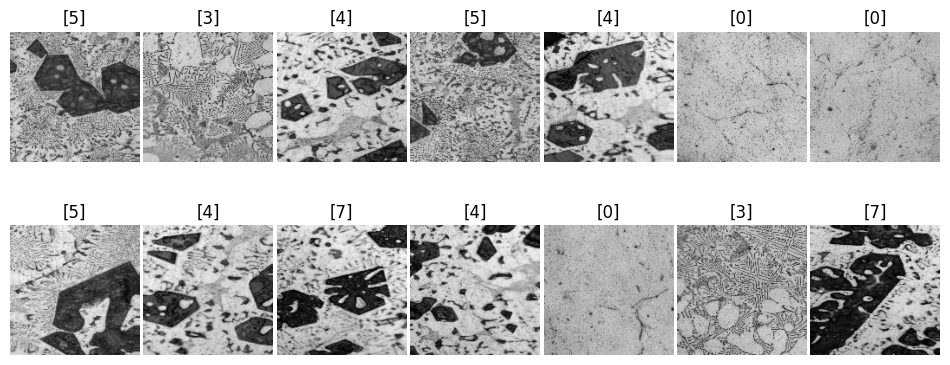

In [ ]:
#show random samples
rand_14 = np.random.randint(0, train_img.shape[0],14)
sample_img = train_img[rand_14]
sample_labels = train_labels[rand_14]
num_rows, num_cols = 2, 7
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),gridspec_kw={'wspace':0.03, 'hspace':0.01})
for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 7 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(sample_img[image_index])
        ax[r,c].set_title('%s' % sample_labels[image_index])
plt.show()
plt.close()

In [ ]:
#one-hot-encode the labels
num_classes = len(labels1)
train_labels_cat = to_categorical(train_labels,num_classes)
test_labels_cat = to_categorical(test_labels,num_classes)
train_labels_cat.shape, test_labels_cat.shape

((3095, 8), (500, 8))

In [ ]:
# re-shape the images data
train_data = train_img
test_data = test_img
train_data.shape, test_data.shape

((3095, 150, 150, 3), (500, 150, 150, 3))

In [ ]:
# shuffle the training dataset & set aside val_perc % of rows as validation data
for _ in range(5):
    indexes = np.random.permutation(len(train_data))

# randomly sorted!
train_data = train_data[indexes]
train_labels_cat = train_labels_cat[indexes]

# now we will set-aside val_perc% of the train_data/labels as cross-validation sets
val_perc = 0.10
val_count = int(val_perc * len(train_data))
print(val_count)

# first pick validation set
val_data = train_data[:val_count,:]
val_labels_cat = train_labels_cat[:val_count,:]

# leave rest in training set
train_data2 = train_data[val_count:,:]
train_labels_cat2 = train_labels_cat[val_count:,:]

train_data2.shape, train_labels_cat2.shape, val_data.shape, val_labels_cat.shape, test_data.shape, test_labels_cat.shape

309


((2786, 150, 150, 3),
 (2786, 8),
 (309, 150, 150, 3),
 (309, 8),
 (500, 150, 150, 3),
 (500, 8))

In [ ]:
# a utility function that plots the losses and accuracies for training & validation sets across our epochs
def show_plots(history):
    """ Useful function to view plot of loss values & accuracies across the various epochs """
    loss_vals = history['loss']
    val_loss_vals = history['val_loss']
    epochs = range(1, len(history['accuracy'])+1)

    f, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

    # plot losses on ax[0]
    ax[0].plot(epochs, loss_vals, color='navy',marker='o', linestyle=' ', label='Training Loss')
    ax[0].plot(epochs, val_loss_vals, color='firebrick', marker='*', label='Validation Loss')
    ax[0].set_title('Training & Validation Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend(loc='best')
    ax[0].grid(True)

    # plot accuracies
    acc_vals = history['accuracy']
    val_acc_vals = history['val_accuracy']

    ax[1].plot(epochs, acc_vals, color='navy', marker='o', ls=' ', label='Training Accuracy')
    ax[1].plot(epochs, val_acc_vals, color='firebrick', marker='*', label='Validation Accuracy')
    ax[1].set_title('Training & Validation Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend(loc='best')
    ax[1].grid(True)

    plt.show()
    plt.close()

    # delete locals from heap before exiting
    del loss_vals, val_loss_vals, epochs, acc_vals, val_acc_vals

In [ ]:
def print_time_taken(start_time, end_time):
    secs_elapsed = end_time - start_time

    SECS_PER_MIN = 60
    SECS_PER_HR  = 60 * SECS_PER_MIN

    hrs_elapsed, secs_elapsed = divmod(secs_elapsed, SECS_PER_HR)
    mins_elapsed, secs_elapsed = divmod(secs_elapsed, SECS_PER_MIN)

    if hrs_elapsed > 0:
        print('Time taken: %d hrs %d mins %d secs' % (hrs_elapsed, mins_elapsed, secs_elapsed))
    elif mins_elapsed > 0:
        print('Time taken: %d mins %d secs' % (mins_elapsed, secs_elapsed))
    elif secs_elapsed > 1:
        print('Time taken: %d secs' % (secs_elapsed))
    else:
        print('Time taken - less than 1 sec')

In [ ]:

def get_commonname(idx):
    sciname = labels1[idx][0]
    return {
        'Al-0Mg2Si':'0Mg',
        'Al-5Mg2Si':'5Mg',
        'Al-10Mg2Si':'10Mg',
        'Al-15Mg2Si':'15Mg',
        'Al-20Mg2Si':'20Mg',
        'Al-22.5Mg2Si':'22.5Mg',
        'Al-25Mg2Si':'25Mg',
        'Al-30Mg2Si':'30Mg'
    }[sciname]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from PIL import Image

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=30,
        zoom_range = 0.25,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest')

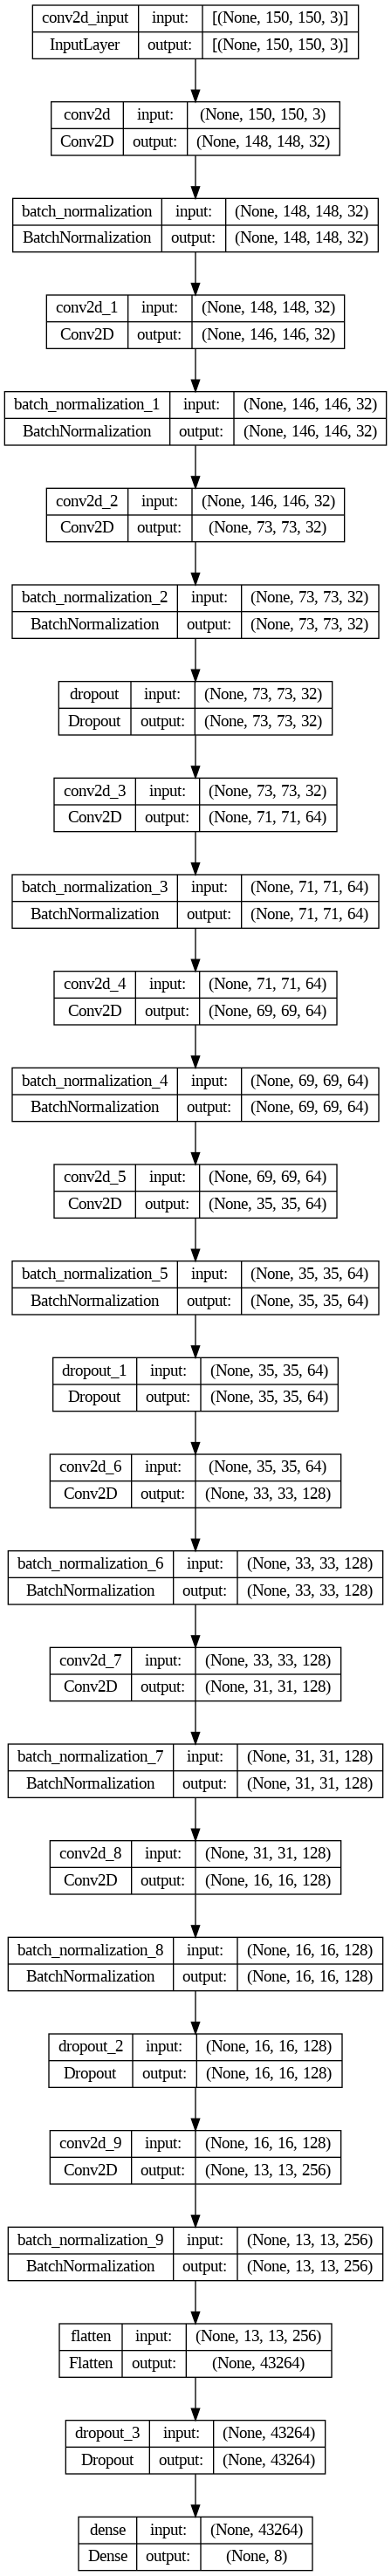

In [ ]:
from tensorflow.keras.utils import plot_model
model = Sequential()

model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (150, 150, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))


model.add(Conv2D(256, kernel_size = 4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

# use adam optimizer and categorical cross entropy cost
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
plot_model(model, to_file='custom_cnn_block_diagram.png', show_shapes=True)

In [ ]:
#from PIL import ImageFont

#font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, legend=True, to_file='output.png')
cv2_imshow('output.png')

AttributeError: 'str' object has no attribute 'clip'

In [ ]:
# after each epoch decrease learning rate by 0.95
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

# train
epochs = 50
j=0
start_time = time.time()
history = model.fit_generator(datagen.flow(train_data2, train_labels_cat2, batch_size=64),epochs = epochs, steps_per_epoch = train_data2.shape[0]/64,validation_data = (val_data, val_labels_cat), callbacks=[annealer], verbose=1)
end_time = time.time()
print_time_taken(start_time, end_time)


<ipython-input-25-0c10f318913e>:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(train_data2, train_labels_cat2, batch_size=64),epochs = epochs, steps_per_epoch = train_data2.shape[0]/64,validation_data = (val_data, val_labels_cat), callbacks=[annealer], verbose=1)


Epoch 1/50
43/43 [==============================] - 47s 630ms/step - loss: 1.9971 - accuracy: 0.5549 - val_loss: 260.0567 - val_accuracy: 0.1942 - lr: 0.0010
Epoch 2/50
43/43 [==============================] - 20s 459ms/step - loss: 1.3564 - accuracy: 0.7732 - val_loss: 26.9902 - val_accuracy: 0.3528 - lr: 9.5000e-04
Epoch 3/50
43/43 [==============================] - 22s 508ms/step - loss: 1.5940 - accuracy: 0.7670 - val_loss: 26.8861 - val_accuracy: 0.4013 - lr: 9.0250e-04
Epoch 4/50
43/43 [==============================] - 20s 451ms/step - loss: 0.9934 - accuracy: 0.8442 - val_loss: 35.1379 - val_accuracy: 0.4369 - lr: 8.5737e-04
Epoch 5/50
43/43 [==============================] - 20s 460ms/step - loss: 0.9478 - accuracy: 0.8683 - val_loss: 46.6591 - val_accuracy: 0.3074 - lr: 8.1451e-04
Epoch 6/50
43/43 [==============================] - 22s 504ms/step - loss: 0.6189 - accuracy: 0.8959 - val_loss: 26.6512 - val_accuracy: 0.3851 - lr: 7.7378e-04
Epoch 7/50
43/43 [===================

In [ ]:
print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(j+1,epochs,history.history['accuracy'][epochs-1],history.history['val_accuracy'][epochs-1]))

CNN 1: Epochs=50, Train accuracy=0.97236, Validation accuracy=0.96764


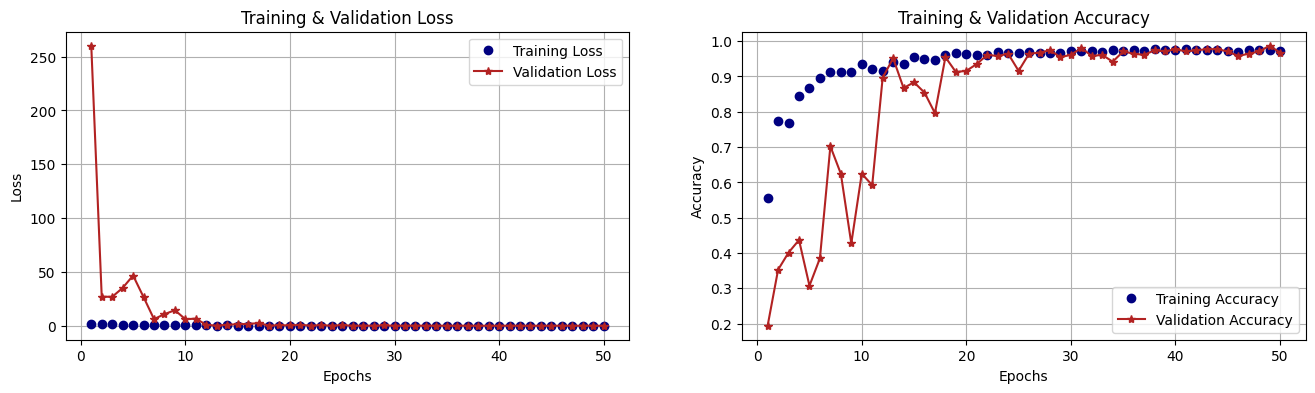

In [ ]:
show_plots(history.history)

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels_cat, batch_size=64)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

8/8 [==============================] - 3s 348ms/step - loss: 16.0231 - accuracy: 0.5840
Test loss: 16.0231 accuracy: 0.5840


['Al-0Mg2Si' 'Al-5Mg2Si' 'Al-15Mg2Si' 'Al-10Mg2Si' 'Al-25Mg2Si'
 'Al-22.5Mg2Si' 'Al-20Mg2Si' 'Al-30Mg2Si']


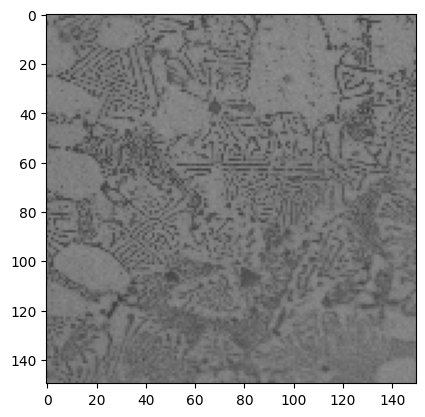

1/1 [==============================] - 0s 17ms/step
actual: 15Mg
predicted: 10Mg


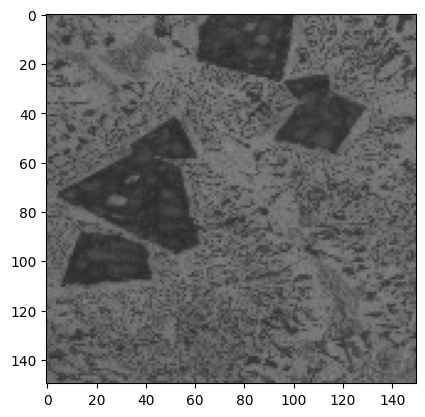

1/1 [==============================] - 0s 18ms/step
actual: 22.5Mg
predicted: 22.5Mg


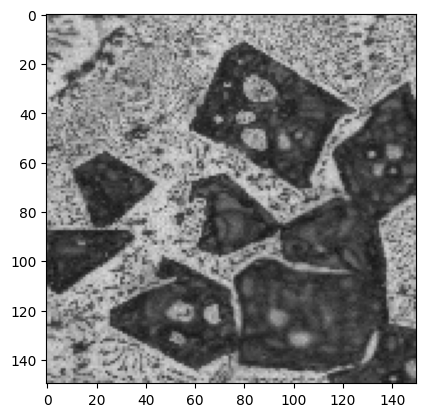

1/1 [==============================] - 0s 17ms/step
actual: 22.5Mg
predicted: 22.5Mg


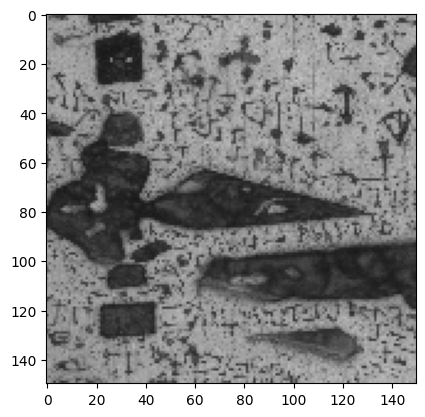

1/1 [==============================] - 0s 17ms/step
actual: 25Mg
predicted: 30Mg


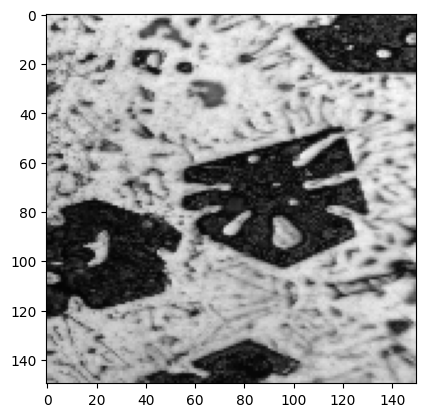

1/1 [==============================] - 0s 17ms/step
actual: 25Mg
predicted: 30Mg


In [ ]:
im_list = [100,250,312,209,245]
output = { 0:'Al-0Mg2Si',3:'Al-10Mg2Si',2:'Al-15Mg2Si',6:'Al-20Mg2Si',5:'Al-22.5Mg2Si',4:'Al-25Mg2Si',7:'Al-30Mg2Si',1:'Al-5Mg2Si'}
print(labels1)
for i in im_list:
#     i = 1000  #index from test data to be used, change this other value to see a different image
    img = test_data[i]
    plt.imshow(img)
    plt.show()
    pred = np.argmax(model.predict(img.reshape(-1,150,150,3)))
    actual =  test_labels[i]
    print(f'actual: {get_commonname(actual)}')
    print(f'predicted: {get_commonname([pred])}')

1/1 [==============================] - 0s 26ms/step
[<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7dc7647fe650>, <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7dc7612947f0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7dc7633f7100>, <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7dc7633f7be0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7dc7fbff2e90>, <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7dc7612587f0>, <keras.src.layers.regularization.dropout.Dropout object at 0x7dc7647ff550>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7dc76016b490>, <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7dc76016b220>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7dc74c0d5000>, <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7dc74c0d6230>, <keras.src.layer

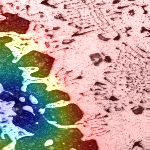

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# Select a target image
# img_path = 'path/to/your/image.jpg'
img_path ='/content/drive/MyDrive/Image_new_dataset/train/Al-30Mg2Si/Al-30Mg2Si_0_1134.jpg'
# img = image.load_img(img_path, target_size=(224, 224))
x = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
x = cv2.resize(x, (150, 150))
img_array = np.array([x])

# Get the predictions for the image
preds = model.predict(np.array([x]))
predicted_class = np.argmax(preds[0])

def make_gradcam_heatmap(img_array, model1, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    model = model1
    model.layers[-1].activation = None
    layers = model.layers
    print(layers)
    last_conv_layer_name = layers[-5].name

    # Get the output of the final convolutional layer
    print("Selected layer:", last_conv_layer_name)
    # last_conv_layer = model.get_layer('conv2d_9')
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model)


def save_and_display_gradcam(img_array, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = img_array

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    # superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    # superimposed_img.save(cam_path)
    print(superimposed_img.shape)

    # Display Grad CAM
    cv2_imshow(superimposed_img)


save_and_display_gradcam(img_array[0], heatmap)



# Save or display the resulting image
# cv2.imwrite('/content/drive/MyDrive/Image_new_dataset/result.jpg', superimposed_img)
# cv2_imshow(superimposed_img)

In [ ]:
import numpy as np

img_path ='/content/drive/MyDrive/Image_new_dataset/train/Al-30Mg2Si/Al-30Mg2Si_0_1134.jpg'
# img = image.load_img(img_path, target_size=(224, 224))
x = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
x = cv2.resize(x, (150, 150))
img_array = np.array([x])
label = model.predict(img_array)

output = { 0:'Al-0Mg2Si',3:'Al-10Mg2Si',2:'Al-15Mg2Si',6:'Al-20Mg2Si',5:'Al-22.5Mg2Si',4:'Al-25Mg2Si',7:'Al-30Mg2Si',1:'Al-5Mg2Si'}


print(label)
max_id = output[np.argmax(label)]
max_id

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 0. 0. 1.]]


'Al-30Mg2Si'

In [ ]:
from scipy.interpolate import make_interp_spline
import numpy as np
from matplotlib import pyplot as plt


class xyspliner:
    def __init__(self, X_axis_vals=[], Y_axis_vals=[]):
        if len(X_axis_vals) == len(Y_axis_vals):
            datlist = [[X_axis_vals[i], Y_axis_vals[i]] for i in range(len(X_axis_vals))]
            data=np.array(datlist)
            self.x,self.y=data.T
            self.X_Y_Spline = make_interp_spline([x[0] for x in datlist], [x[1] for x in datlist])
            print(self.X_Y_Spline.tck)
        else:
            self.x = np.array([])
            self.y = np.array([])
            self.X_Y_Spline = None

    def get_yval(self, x):
        Y_ = self.X_Y_Spline(x)
        return Y_

    def get_range_vals(self):
        X_ = np.linspace(self.x.min(), self.x.max(), 500)
        Y_ = self.X_Y_Spline(X_)
        return X_, Y_

alphavol_xyspliner_obj = xyspliner([-1, 0, 5, 10, 15, 20, 22.5, 25, 30], [110, 100, 92, 34, 46, 58, 60, 62, 63])
val_pred = 17
print()
print("Mg2Si:", val_pred, "alphavol: ", alphavol_xyspliner_obj.get_yval(val_pred))


(array([-1. , -1. , -1. , -1. ,  5. , 10. , 15. , 20. , 22.5, 30. , 30. ,
       30. , 30. ]), array([110.        ,  82.38875319, 124.31246813,   8.68758852,
        52.16373275,  57.57518919,  61.11027478,  64.55639189,
        63.        ]), 3)

Mg2Si: 17 alphavol:  53.387786815588214


In [ ]:
# Interpolating value of Al-Mg2Si Class 17
y_new = np.interp(17,[-1, 0, 5, 10, 15, 20, 22.5, 25, 30], [110, 100, 92, 34, 46, 58, 60, 62, 63])
print(y_new)

50.8


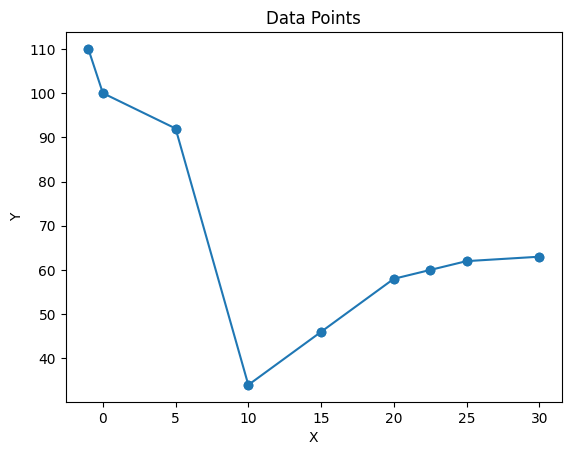

In [ ]:
#Just plotting the curve between the data points of
import matplotlib.pyplot as plt

# Data points
x = [-1, 0, 5, 10, 15, 20, 22.5, 25, 30]
y = [110, 100, 92, 34, 46, 58, 60, 62, 63]
plt.plot(x, y, marker='o')
# Plot the data points
plt.scatter(x, y)

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Points')


# Display the graph
plt.show()


In [ ]:
output = { 0:'Al-0Mg2Si',3:'Al-10Mg2Si',2:'Al-15Mg2Si',6:'Al-20Mg2Si',5:'Al-22.5Mg2Si',4:'Al-25Mg2Si',7:'Al-30Mg2Si',1:'Al-5Mg2Si'}
def return_mg2_content(label):
    resulty = label[0].tolist()
    ko = resulty[-1]
    # rearrange predict output values in increasing order of class
    ko2 = [resulty[0]] + [resulty[-1]] + [resulty[2]] + [resulty[1]] + [resulty[-3]] + [resulty[-4]] + [resulty[-5]] + [resulty[-2]]
    resulty = np.array(ko2)
    ind = np.argpartition(resulty, -4)[-4:]
    print(ind)
    top4 = resulty[ind]
    mg2content = np.array([ 0, 5, 10, 15, 20, 22.5, 25, 30])
    top4content = mg2content[ind]
    print(top4)
    print(top4content)
    #Now find the max matching and the spread if it is up or down
    if ind[-1] > 0 and ind[-1] < 7:
        bottom = ind[-1] - 1
        top = ind[-1] + 1
        if top4[bottom] >= top4[top]:
            ksmall = bottom
            kbig = ind[-1]
        else:
            ksmall = ind[-1]
            kbig = top
    else:
        if ind[-1] == 0:
            top = ind[-1] + 1
            ksmall = ind[-1]
            kbig = top
        else:
            bottom = ind[-1] - 1
            ksmall = bottom
            kbig = ind[-1]
    print(ksmall, resulty[ksmall], kbig, resulty[kbig])
    print(ksmall, mg2content[ksmall], kbig, mg2content[kbig])
    tempy = resulty[kbig] / (resulty[kbig] + resulty[ksmall])
    tempy2 = tempy * (mg2content[kbig] - mg2content[ksmall])
    if mg2content[ksmall] > mg2content[kbig]:
        tempy3 = mg2content[ksmall] - tempy2
    elif mg2content[ksmall] <= mg2content[kbig]:
        tempy3 = mg2content[ksmall] + tempy2
    print("Calculated mg2content", tempy3)
    return tempy3

In [ ]:
import numpy as np

img_path ='/content/drive/MyDrive/Image_new_dataset/test/Al-15Mg2Si/Copy of Al-15Mg2Si_0_8841.jpg'
# img = image.load_img(img_path, target_size=(224, 224))
x = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
x = cv2.resize(x, (150, 150))
img_array = np.array([x])
label = model.predict(img_array)

output = { 0:'Al-0Mg2Si',3:'Al-10Mg2Si',2:'Al-15Mg2Si',6:'Al-20Mg2Si',5:'Al-22.5Mg2Si',4:'Al-25Mg2Si',7:'Al-30Mg2Si',1:'Al-5Mg2Si'}


print("Class Value:",label)
max_id = output[np.argmax(label)]
print("Class label:", max_id)
print("Predicted Mg2 content label:\n", return_mg2_content(label))

1/1 [==============================] - 0s 28ms/step
Class Value: [[3.1210433e-32 4.8113431e-30 1.0000000e+00 1.0350895e-24 1.1380870e-30
  0.0000000e+00 0.0000000e+00 2.5569277e-19]]
Class label: Al-15Mg2Si
[3 2 6 1]
[4.81134314e-30 1.00000000e+00 1.03508954e-24 2.55692772e-19]
[15. 10. 25.  5.]
1 2.5569277182659275e-19 2 1.0
1 5.0 2 10.0
Calculated mg2content 10.0
Predicted Mg2 content label:
 10.0
